In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("Walmart_Sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit
0,1.0,05-02-2010,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83
1,1.0,12-02-2010,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06
2,NaN,19-02-2010,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39
3,1.0,26-02-2010,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99
4,1.0,05-03-2010,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
df['date_year'] = df['Date'].dt.year
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year
3401,24.0,2012-03-30,1230106.13,0.0,47.28,4.098,137.726193,9.0,180633.9220,2012
752,6.0,2010-10-22,1332716.53,0.0,70.97,2.725,213.382049,7.0,161630.2104,2010
4129,29.0,2012-06-29,555954.13,0.0,70.99,3.577,138.196267,9.0,111461.9497,2012
2387,17.0,2011-12-30,777207.30,1.0,NaN,3.119,130.071032,7.0,149849.5324,2011
1922,14.0,2011-04-22,2256461.39,0.0,53.04,3.892,185.668467,9.0,70153.5447,2011


In [5]:
df['date_month'] = df['Date'].dt.month
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month
4385,31.0,2011-12-02,1388809.43,0.0,48.72,3.172,218.359032,7.0,51690.59960,2011,12
190,2.0,2010-12-31,1750434.55,1.0,47.30,2.943,211.064774,8.0,156935.87930,2010,12
2406,17.0,2012-05-11,944100.30,0.0,49.96,3.809,131.145333,6.0,59981.49735,2012,5
1054,8.0,2011-02-11,996147.39,1.0,28.26,3.022,216.312673,6.0,89803.10053,2011,2
4564,32.0,2012-08-10,1227469.20,0.0,75.93,3.509,198.079565,8.0,71885.19331,2012,8


In [6]:
df['date_day'] = df['Date'].dt.day
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day
1741,13.0,2010-07-30,1817887.23,0.0,78.94,2.797,126.106903,8.0,166902.04250,2010,7,30
721,6.0,2010-03-19,1693058.91,0.0,56.55,2.720,212.735194,7.0,88481.51178,2010,3,19
173,2.0,2010-09-03,1904608.09,0.0,81.83,2.577,211.188693,8.0,88870.21435,2010,9,3
704,5.0,2012-08-17,314014.18,0.0,87.52,3.571,222.627675,6.0,182202.40090,2012,8,17
2961,21.0,2012-01-13,631181.25,0.0,45.00,3.261,219.532820,7.0,63093.68082,2012,1,13


In [7]:
df['date_dow'] = df['Date'].dt.dayofweek
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2010,2,5,4
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2010,2,12,4
2,NaN,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2010,2,19,4
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2010,2,26,4
4,1.0,2010-03-05,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,2010,3,5,4


In [8]:
df['date_is_weekend'] = np.where(df['date_dow'].isin([5,6]), 1,0)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2010,2,5,4,0
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2010,2,12,4,0
2,NaN,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2010,2,19,4,0
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2010,2,26,4,0
4,1.0,2010-03-05,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,2010,3,5,4,0


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [10]:
df.isnull().mean()*100

Store              0.714841
Date               0.000000
Weekly_Sales       0.000000
Holiday_Flag       1.989122
Temperature        2.175602
Fuel_Price         0.932401
CPI                0.543901
Unemployment       3.387723
Profit             3.139083
date_year          0.000000
date_month         0.000000
date_day           0.000000
date_dow           0.000000
date_is_weekend    0.000000
dtype: float64

In [11]:
# We decide that we remove data which is missing by less than 1%.

In [12]:
l = [col for col in df.columns if df[col].isnull().mean()<0.01 and df[col].isnull().mean()>0]
l

['Store', 'Fuel_Price', 'CPI']

In [13]:
# We do not do Complete Case Analysis on Fuel Price because a set of values or missing
l = l[0:3:2]

In [14]:
l

['Store', 'CPI']

In [15]:
df.dropna(subset = l, inplace=True)

In [16]:
df.isna().mean()*100

Store              0.000000
Date               0.000000
Weekly_Sales       0.000000
Holiday_Flag       1.809884
Temperature        2.108908
Fuel_Price         0.645263
CPI                0.000000
Unemployment       3.289267
Profit             3.021719
date_year          0.000000
date_month         0.000000
date_day           0.000000
date_dow           0.000000
date_is_weekend    0.000000
dtype: float64

In [17]:
 def random_sampling_imputation(column):
        non_missing_values = df[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
        df.loc[df[column].isnull(), column] = random_samples

In [18]:
random_sampling_imputation('Holiday_Flag')

In [19]:
df.isna().mean()*100

Store              0.000000
Date               0.000000
Weekly_Sales       0.000000
Holiday_Flag       0.000000
Temperature        2.108908
Fuel_Price         0.645263
CPI                0.000000
Unemployment       3.289267
Profit             3.021719
date_year          0.000000
date_month         0.000000
date_day           0.000000
date_dow           0.000000
date_is_weekend    0.000000
dtype: float64

In [20]:
def random_sampling_imputation(column):
        non_missing_values = df[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
        df.loc[df[column].isnull(), column] = random_samples

In [21]:
random_sampling_imputation('Holiday_Flag')

Text(0.5, 1.0, 'Temperature')

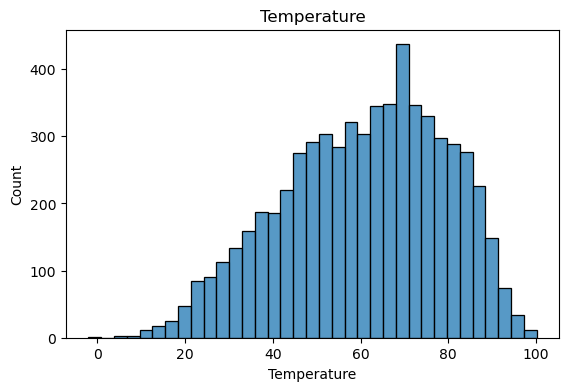

In [22]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Temperature'])
plt.title('Temperature')

In [23]:
def random_sampling_imputation(column):
        non_missing_values = df[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
        df.loc[df[column].isnull(), column] = random_samples

In [24]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Initialize SimpleImputer with median strategy
si = SimpleImputer(strategy='median')

# Impute missing values in 'Temperature' column
df['Temperature'] = si.fit_transform(df[['Temperature']])

# Display the DataFrame after imputation
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31         NaN   
1       1.0 2010-02-12    1641957.44           1.0        38.51         NaN   
3       1.0 2010-02-26    1409727.59           0.0        46.63         NaN   
4       1.0 2010-03-05    1554806.68           0.0        46.50         NaN   
5       1.0 2010-03-12    1439541.59           0.0        57.79         NaN   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32         NaN   
6431   45.0 2012-10-05     733455.07           0.0        64.89         NaN   
6432   45.0 2012-10-12     734464.36           0.0        54.47         NaN   
6433   45.0 2012-10-19     718125.53           0.0        56.47         NaN   
6434   45.0 2012-10-26     760281.43           0.0        58.85         NaN   

             CPI  Unemployment     Profit  date_yea

In [25]:
random_sampling_imputation('Unemployment')

In [26]:
df.isna().sum()

Store                0
Date                 0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price          41
CPI                  0
Unemployment         0
Profit             192
date_year            0
date_month           0
date_day             0
date_dow             0
date_is_weekend      0
dtype: int64

In [27]:
df["Fuel_Price"].fillna(df["Fuel_Price"].max(), inplace=True)
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31       4.468   
1       1.0 2010-02-12    1641957.44           1.0        38.51       4.468   
3       1.0 2010-02-26    1409727.59           0.0        46.63       4.468   
4       1.0 2010-03-05    1554806.68           0.0        46.50       4.468   
5       1.0 2010-03-12    1439541.59           0.0        57.79       4.468   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32       4.468   
6431   45.0 2012-10-05     733455.07           0.0        64.89       4.468   
6432   45.0 2012-10-12     734464.36           0.0        54.47       4.468   
6433   45.0 2012-10-19     718125.53           0.0        56.47       4.468   
6434   45.0 2012-10-26     760281.43           0.0        58.85       4.468   

             CPI  Unemployment     Profit  date_yea

In [28]:
def random_sampling_imputation(column):
        non_missing_values = df[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
        df.loc[df[column].isnull(), column] = random_samples

In [29]:
random_sampling_imputation('Unemployment')

In [30]:
df["Profit"].fillna(df["Profit"].max(), inplace=True)
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31       4.468   
1       1.0 2010-02-12    1641957.44           1.0        38.51       4.468   
3       1.0 2010-02-26    1409727.59           0.0        46.63       4.468   
4       1.0 2010-03-05    1554806.68           0.0        46.50       4.468   
5       1.0 2010-03-12    1439541.59           0.0        57.79       4.468   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32       4.468   
6431   45.0 2012-10-05     733455.07           0.0        64.89       4.468   
6432   45.0 2012-10-12     734464.36           0.0        54.47       4.468   
6433   45.0 2012-10-19     718125.53           0.0        56.47       4.468   
6434   45.0 2012-10-26     760281.43           0.0        58.85       4.468   

             CPI  Unemployment     Profit  date_yea

In [31]:
df.isna().sum()

Store              0
Date               0
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
Profit             0
date_year          0
date_month         0
date_day           0
date_dow           0
date_is_weekend    0
dtype: int64

In [32]:
df = df.drop('Date', axis=1)

In [33]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,1.0,1643690.90,0.0,42.31,4.468,211.096358,8.0,192261.83,2010,2,5,4,0
1,1.0,1641957.44,1.0,38.51,4.468,211.242170,8.0,191792.06,2010,2,12,4,0
3,1.0,1409727.59,0.0,46.63,4.468,211.319643,8.0,182901.99,2010,2,26,4,0
4,1.0,1554806.68,0.0,46.50,4.468,211.350143,8.0,166187.94,2010,3,5,4,0
5,1.0,1439541.59,0.0,57.79,4.468,211.380643,8.0,156991.12,2010,3,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,45.0,723086.20,0.0,65.32,4.468,191.856704,9.0,476485.43,2012,9,21,4,0
6431,45.0,733455.07,0.0,64.89,4.468,192.170412,9.0,476485.43,2012,10,5,4,0
6432,45.0,734464.36,0.0,54.47,4.468,192.327265,9.0,476485.43,2012,10,12,4,0
6433,45.0,718125.53,0.0,56.47,4.468,192.330854,9.0,476485.43,2012,10,19,4,0


In [34]:
for column in df:
    mean = df[column].mean()
    max = df[column].max()
    min = df[column].min()
    df[column] = (df[column] - mean)/(max - mean)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,-0.996857,0.214489,-0.075673,-0.468538,1.0,0.709017,-0.000079,0.169523,-0.93307,-0.799949,-0.696749,NaN,NaN
1,-0.996857,0.213863,1.000000,-0.565036,1.0,0.711646,-0.000079,0.168150,-0.93307,-0.799949,-0.239932,NaN,NaN
3,-0.996857,0.129992,-0.075673,-0.358836,1.0,0.713043,-0.000079,0.142174,-0.93307,-0.799949,0.673702,NaN,NaN
4,-0.996857,0.182388,-0.075673,-0.362137,1.0,0.713593,-0.000079,0.093337,-0.93307,-0.619954,-0.696749,NaN,NaN
5,-0.996857,0.140759,-0.075673,-0.075438,1.0,0.714143,-0.000079,0.066465,-0.93307,-0.619954,-0.239932,NaN,NaN
